# Самостоятельный проект: Аналитика в авмакомпании "F9"

Содержание: <a name="step7"></a> 

   1. [Импортирование библиотек и загрузка данных. Изучениие свойств полученных датасетов;](#step1)
   2. [Анализ полученных данных;](#step2)
   3. [Общий вывод;](#step3)

Исходные датасеты получены из SQL-баз данных. Первый датасет представляет из себя количество полетов на определенных моделях самолетов в сентябре 2018 года. Второй датасет представляет из себя среднее количество рейсов в день в каждый город в августе 2018 года. 

Цель работы: изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

#### Описание данных:

query_1:

    model — модели самолета
    flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
    
query_3:

    city — города
    average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

## Шаг1. Импортирование библиотек и загрузка данных. Изучениие свойств полученных датасетов <a name="step1"></a> 

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Импорт исходных датасетов
filepath1 = r'C:\Users\Torberg\Documents\Yandex Projects\Project5\query_1.csv'
filepath2 = r'C:\Users\Torberg\Documents\Yandex Projects\Project5\query_3.csv'

air_models = pd.read_csv(filepath1)
avg_flights = pd.read_csv(filepath2)


In [3]:
# Изучение их свойств
display(air_models)
air_models.info()


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Промежуточный вывод: Получена таблица из 2 столбцов и 7 строк. Типы данных изменять не нужно, пропусков в данных не обнаружено.

In [4]:
# Округление чисел
avg_flights['average_flights'] = np.round(avg_flights['average_flights'], 2)
display(avg_flights)
avg_flights.info()


,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Промежуточный вывод: Получена таблица из 2 столбцов и 101 строки. Типы данных изменять не нужно, пропусков в данных не обнаружено. Выполнено округление чисел до 2-х знаков (точность до 4-6 знаков, как в исходных данных, нам ни к чему)

In [5]:
# Поиск дубликатов
air_models.duplicated().sum()


0

In [6]:
avg_flights.duplicated().sum()

0

Промежуточный вывод: Поиск дубликатов дал результаты 0 для обеих таблиц. Можно приступать к анализу.

[Наверх](#step7)

## Шаг 2. Анализ полученных данных <a name="step2"></a> 

In [7]:
# Выбраны топ-10 городов по количеству рейсов за август 2018 года
avg_flights_sorted = avg_flights.sort_values(by='average_flights',
                                             ascending=False)
display(avg_flights_sorted.head(10))

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


In [8]:
# Создаю список и словарь для дальнейшей
# работы

air = {1: 'Модель самолета', 2: 'Количество полетов',
       3: 'Город', 4: 'Среднее количество полетов'}
titles_list = ['Количество полетов на определенной модели самолета',
               'Среднее количество полетов в города РФ',
               'Топ-10 городов по полетам']

In [9]:
# Создаю "страшную" функцию для построения необходимых графиков :))
def plotbuilt(graph, column1, column2, data, title, diction, x, y, yrotation):
    plt.figure(figsize=(24, 20))
    graph(data[column1], data[column2], label=diction)
    plt.title(title, fontsize=16)
    plt.tick_params(axis='x', which='major', labelsize=12,
                    labelrotation=yrotation)
    plt.tick_params(axis='y', which='major', labelsize=12)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.legend(fontsize=16)
    plt.show()


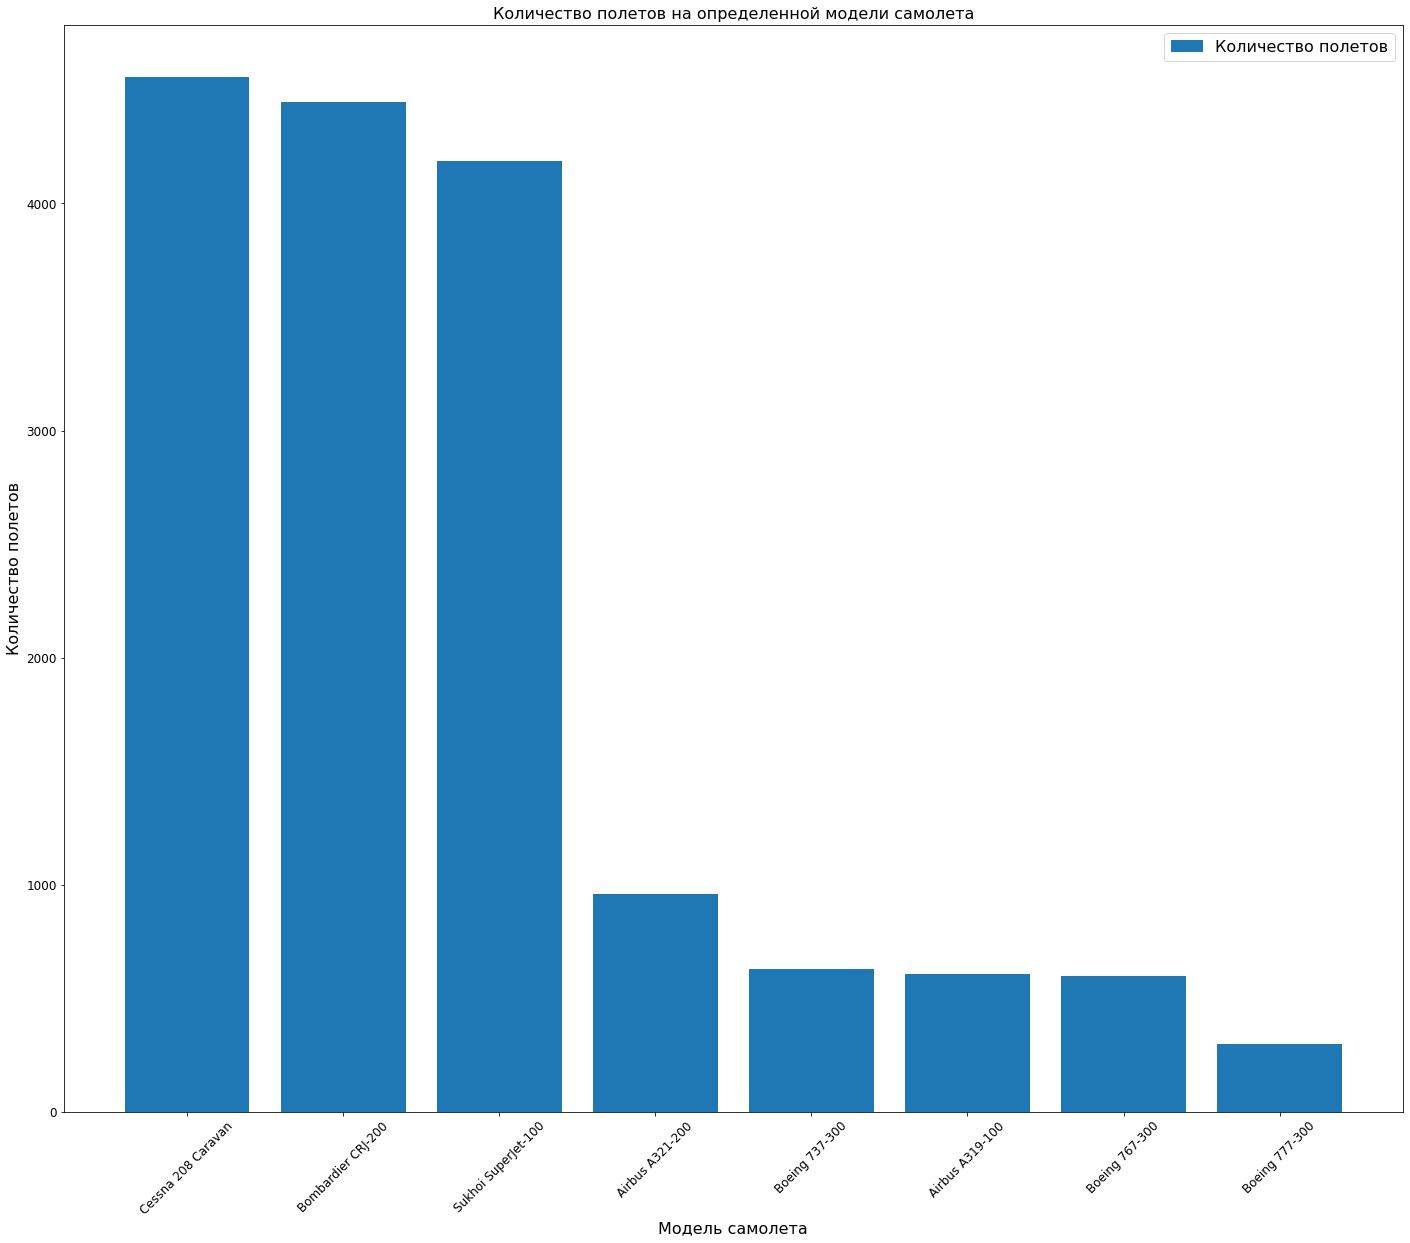

In [10]:
# Поскольку в данных используются выборки по городам/моделям самолетов
# наилучшим способом визуализации считаю гистограмму
plotbuilt(plt.bar, 'model', 'flights_amount',
          air_models.sort_values(by='flights_amount', ascending=False),
          titles_list[0], air[2], air[1], air[2], 45)


Промежуточный вывод: модели самолетов Airbus и Boeing не пользовались популярностью среди пассажиров самолетов в сентябре. Лидерами являются Bombardier, Cessna, Sukhoi Superjet. "Самолеты Сухого" - это российская корпорация и к тому же вместительность этой модели около 100 человек, поэтому эта модель присутствует в топе. К тому же топ-3 модели лучше всего подходят для региональных перелетов. В случае изучения данных по международным перелетам картина будет другая. 

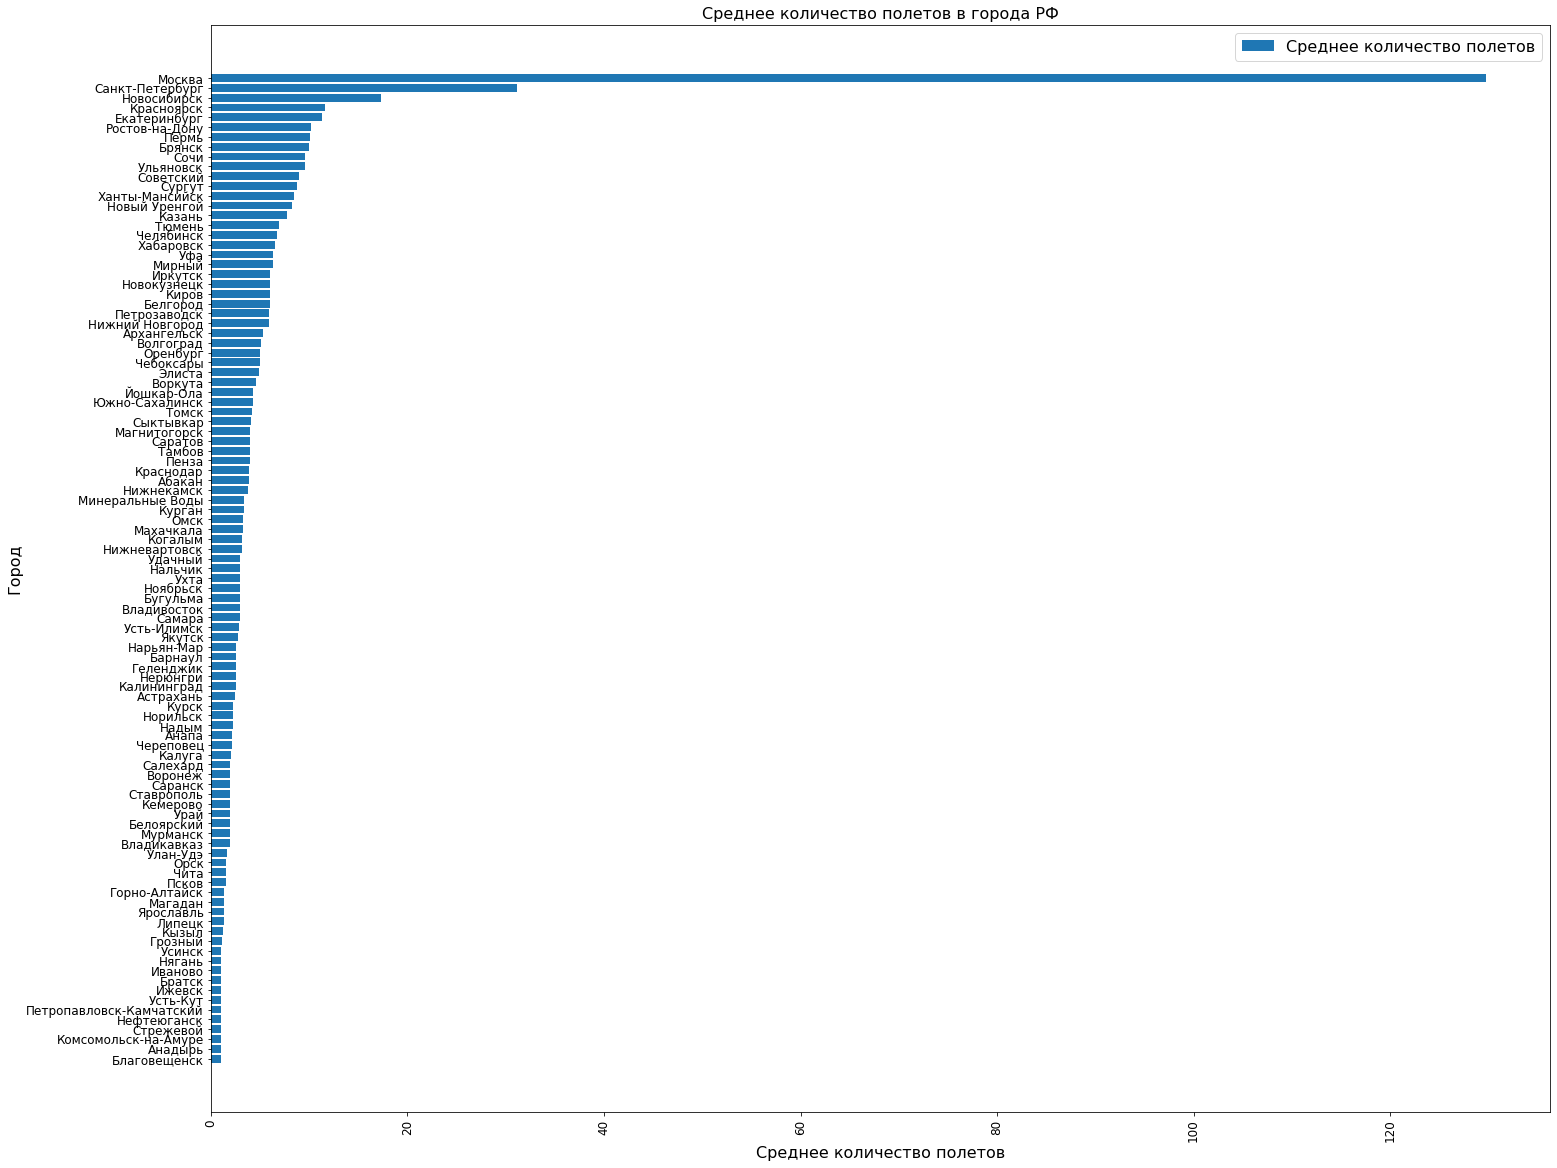

In [11]:
plotbuilt(plt.barh, 'city', 'average_flights',
          avg_flights.sort_values(by='average_flights'),
          titles_list[1], air[4], air[4], air[3], 90)


Промежуточный вывод: Ярковыраженными лидерами по среднему количеству рейсов в день являются Москва и Санкт-Петербург. Для более детального анализа стоит рассмотреть топ-10 городов.

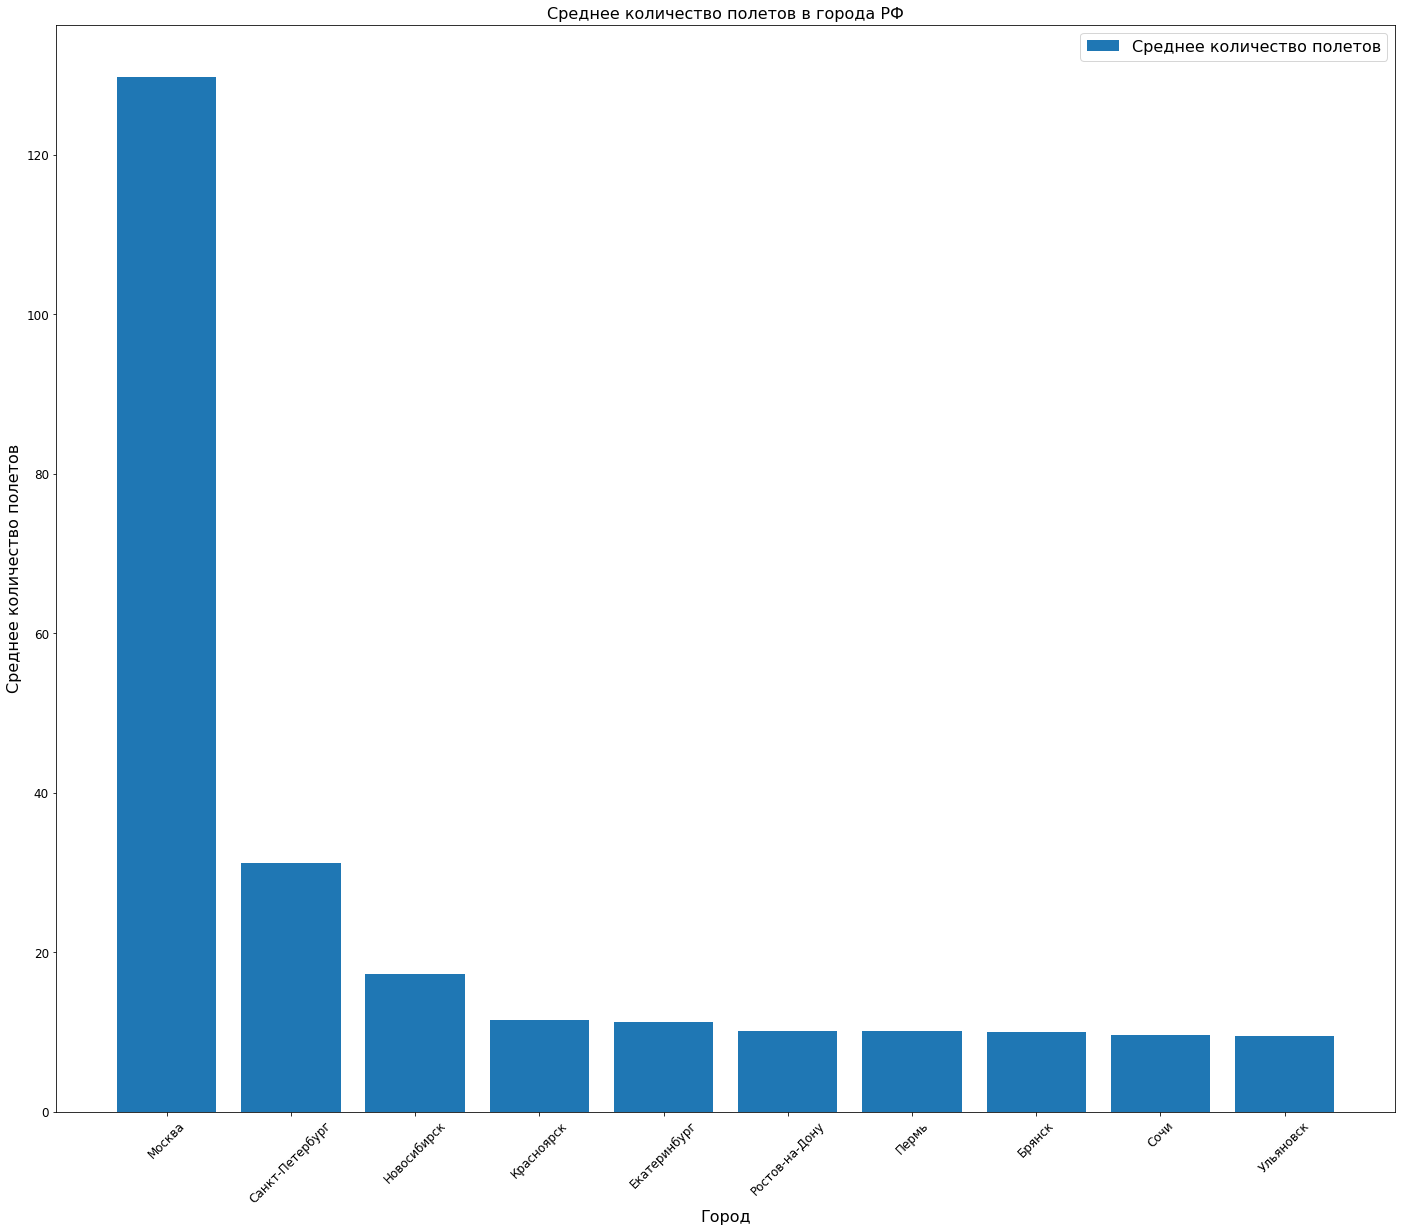

In [12]:
avg_flights_top10 = avg_flights_sorted[avg_flights_sorted
                                       ['average_flights'] > 9.57]
plotbuilt(plt.bar, 'city', 'average_flights', avg_flights_top10,
          titles_list[1], air[4], air[3], air[4], 45)

Промежуточный вывод: полученный график подтверждает промежуточный вывод, полученный выше. Для всех городов кроме Москвы и Санкт-Петербурга среднее количество рейсов в день примерно одинаково. Немного больше у Новосибирска, однако в нем не проходило музыкальных фестивалей в августе 2018 года. В Санкт-Петербурге ни одного фестиваля, в Москве 1 фестиваль. Однако Москва и Санкт-Петербург самые популярные направления для полетов, поэтому музыкальные фестивали невозможно привязать к количеству купленных билетов и среднему количеству полетов в день. 

Комментарий студента: все манипуляции, о которых говорится выше, я проделал в тренажере на 3 шаге проекта.

[Наверх](#step7)

## Шаг 3. Общий вывод <a name="step3"></a> 

По результатам проделанной работы с базами данных и средствами Python можно сделать следующий вывод: проведение крупных музыкальных фестивалей не влияет на спрос пассажиров на авиабилеты в августе 2018 года. Однако за один месяц наблюдений делать такой вывод слишком рикованно, думаю, что стоит взять более длительный период наблюдений.